In [26]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
iris_df = load_iris()

In [2]:
dir(iris_df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris_df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris_df.data, columns=iris_df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df["target"] = iris_df.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
targ_name = []
for i in iris_df.target:
    if i == 0:
        i = 'setosa'
        targ_name.append(i)
    elif i ==  1:
        i = 'versicolor'
        targ_name.append(i)
    else:
        i = 'virginica'
        targ_name.append(i)
print(targ_name)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [7]:
df["target_names"] = targ_name
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df.groupby("target_names").sum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_names,,,,,
setosa,250.3,171.4,73.1,12.3,0
versicolor,296.8,138.5,213.0,66.3,50
virginica,329.4,148.7,277.6,101.3,100


In [9]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

Text(0, 0.5, 'sepal width (cm)')

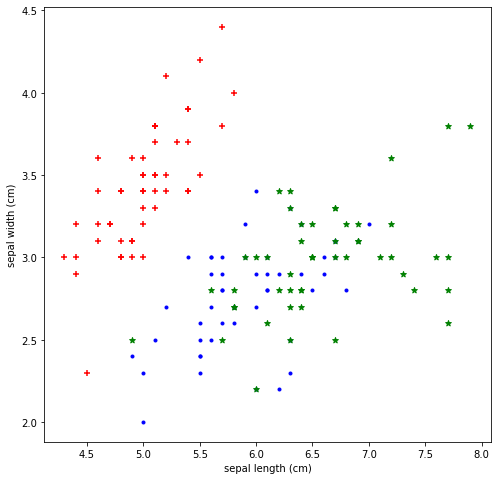

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="red",marker="+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker=".")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="green",marker="*")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'petal width (cm)')

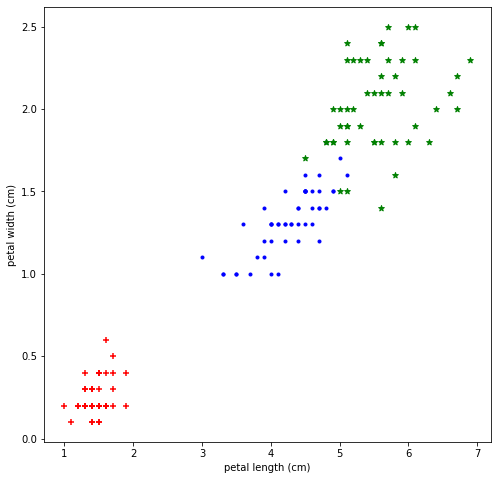

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="red",marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue",marker=".")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="green",marker="*")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [12]:
X = df.drop(["target","target_names"], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.score(X_test,y_test)

0.9666666666666667

Text(0.5, 33.0, 'Predicted')

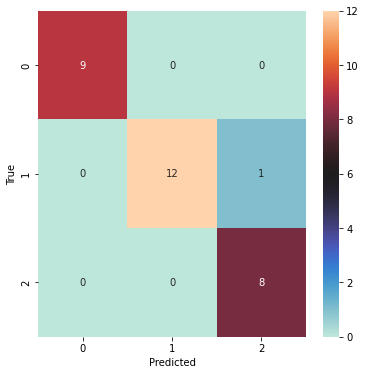

In [25]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True, cmap="icefire")
plt.ylabel("True")
plt.xlabel("Predicted")

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

